<a href="https://colab.research.google.com/github/maria-clavijo/project_playstore_apps/blob/main/API/API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google_play_scraper

# **Recolección de datos desde la API**

In [ ]:
from google_play_scraper import search, app
import pandas as pd

categorias = [
    'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
    'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT',
    'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
    'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL',
    'MUSIC_AND_AUDIO', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION',
    'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS',
    'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER', 'GAME_ARCADE', 'GAME_PUZZLE',
    'GAME_CARD', 'GAME_CASUAL', 'GAME_RACING', 'GAME_SPORTS', 'GAME_SIMULATION',
    'GAME_ACTION', 'GAME_STRATEGY', 'GAME_ROLE_PLAYING'
]

apps_por_categoria = 100

def obtener_datos_categoria(categoria):
    result = []
    try:
        app_list = search(categoria, lang='en', country='us')
        app_ids = [app['appId'] for app in app_list][:apps_por_categoria]
        for app_id in app_ids:
            app_info = app(app_id)
            app_info['categoria'] = categoria
            if 'score' in app_info:
                app_info['score'] = round(app_info['score'], 1)
            result.append(app_info)
    except Exception as e:
        print(f"Error al obtener datos para la categoría {categoria}: {str(e)}")
    return result

datos_apps = {}
for categoria in categorias:
    datos_apps[categoria] = obtener_datos_categoria(categoria)
    print(f"Datos recogidos para la categoría {categoria}: {len(datos_apps[categoria])} apps")

df_apps = pd.DataFrame([
    app_data
    for categoria, apps in datos_apps.items()
    for app_data in apps
])

nombre_archivo = 'datos_apps_google_play.csv'
df_apps.to_csv(nombre_archivo, index=False)
print(f'Datos guardados en el archivo: {nombre_archivo}')


Datos recogidos para la categoría ART_AND_DESIGN: 30 apps
Datos recogidos para la categoría AUTO_AND_VEHICLES: 30 apps
Datos recogidos para la categoría BEAUTY: 30 apps
Datos recogidos para la categoría BOOKS_AND_REFERENCE: 10 apps
Datos recogidos para la categoría BUSINESS: 30 apps
Datos recogidos para la categoría COMICS: 30 apps
Datos recogidos para la categoría COMMUNICATION: 24 apps
Datos recogidos para la categoría DATING: 30 apps
Datos recogidos para la categoría EDUCATION: 21 apps
Datos recogidos para la categoría ENTERTAINMENT: 28 apps
Datos recogidos para la categoría EVENTS: 30 apps
Datos recogidos para la categoría FINANCE: 30 apps
Datos recogidos para la categoría FOOD_AND_DRINK: 26 apps
Datos recogidos para la categoría HEALTH_AND_FITNESS: 26 apps
Datos recogidos para la categoría HOUSE_AND_HOME: 30 apps
Datos recogidos para la categoría LIBRARIES_AND_DEMO: 30 apps
Datos recogidos para la categoría LIFESTYLE: 30 apps
Datos recogidos para la categoría MAPS_AND_NAVIGATION: 

# **Limpieza de datos**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/datos_apps_google_play.csv')

columnas_a_eliminar = [
    'description', 'descriptionHTML', 'summary', 'histogram', 'price', 'reviews',
    'currency', 'sale', 'saleTime', 'originalPrice', 'saleText', 'realinstalls',
    'offersIAP', 'inAppProductPrice', 'developer', 'developerId',
    'developerEmail', 'developerWebsite', 'developerAddress', 'privacyPolicy',
    'genreId', 'categories', 'icon', 'headerImage', 'screenshots',
    'video', 'videoImage', 'contentRatingDescription', 'adSupported',
    'containsAds', 'updated', 'version', 'comments', 'appId', 'url', 'categoria'
]

df = df.drop(columns=columnas_a_eliminar, errors='ignore')

nombre_archivo_salida = '/content/datos_apps_google_play_limpio.csv'
df.to_csv(nombre_archivo_salida, index=False)

print(f'Datos limpios guardados en el archivo: {nombre_archivo_salida}')


Datos limpios guardados en el archivo: /content/datos_apps_google_play_limpio.csv


# **EDA**

In [ ]:
data.head()

,title,installs,minInstalls,realInstalls,score,ratings,free,genre,contentRating,released,lastUpdatedOn
0,"Concepts: Sketch, Note, Draw","1,000,000+",1000000,4514867,4.4,17580,True,Art & Design,Everyone,"Nov 16, 2018","Apr 11, 2024"
1,Infinite Design,"10,000,000+",10000000,13989155,3.2,73580,True,Art & Design,Everyone,"Sep 19, 2011","Dec 23, 2021"
2,Adobe Express: Graphic Design,"10,000,000+",10000000,32634484,4.6,274297,True,Art & Design,Everyone,"Jun 18, 2018","Mar 4, 2024"
3,ArtFlow: Paint Draw Sketchbook,"5,000,000+",5000000,5517767,3.5,33604,True,Art & Design,Everyone,"May 23, 2013","Dec 26, 2023"
4,"Drawing Apps: Draw, Sketch Pad","5,000,000+",5000000,8867088,4.3,8433,True,Art & Design,Everyone,"Sep 5, 2022","Jan 4, 2024"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1113 non-null   object 
 1   installs       1113 non-null   object 
 2   minInstalls    1113 non-null   int64  
 3   realInstalls   1113 non-null   int64  
 4   score          1113 non-null   float64
 5   ratings        1113 non-null   int64  
 6   free           1113 non-null   bool   
 7   genre          1113 non-null   object 
 8   contentRating  1113 non-null   object 
 9   released       1085 non-null   object 
 10  lastUpdatedOn  1113 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 88.2+ KB


In [ ]:
data.describe(include='all')

,title,installs,minInstalls,realInstalls,score,ratings,free,genre,contentRating,released,lastUpdatedOn
count,1113,1113,1.113000e+03,1.113000e+03,1113.000000,1.113000e+03,1113,1113,1113,1085,1113
unique,1004,17,NaN,NaN,NaN,NaN,2,45,4,867,183
top,Video Player All Format,"10,000,000+",NaN,NaN,NaN,NaN,True,Sports,Everyone,"Dec 10, 2014","Apr 11, 2024"
freq,5,226,NaN,NaN,NaN,NaN,1101,54,803,5,104
mean,NaN,NaN,2.915471e+08,4.747762e+08,4.304942,4.160160e+06,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.167507e+09,1.763872e+09,0.556649,1.502523e+07,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,5.000000e+01,5.700000e+01,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000e+06,3.867768e+06,4.200000,3.464500e+04,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.000000e+07,2.617386e+07,4.400000,3.453130e+05,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.000000e+08,1.964480e+08,4.600000,2.489209e+06,NaN,NaN,NaN,NaN,NaN


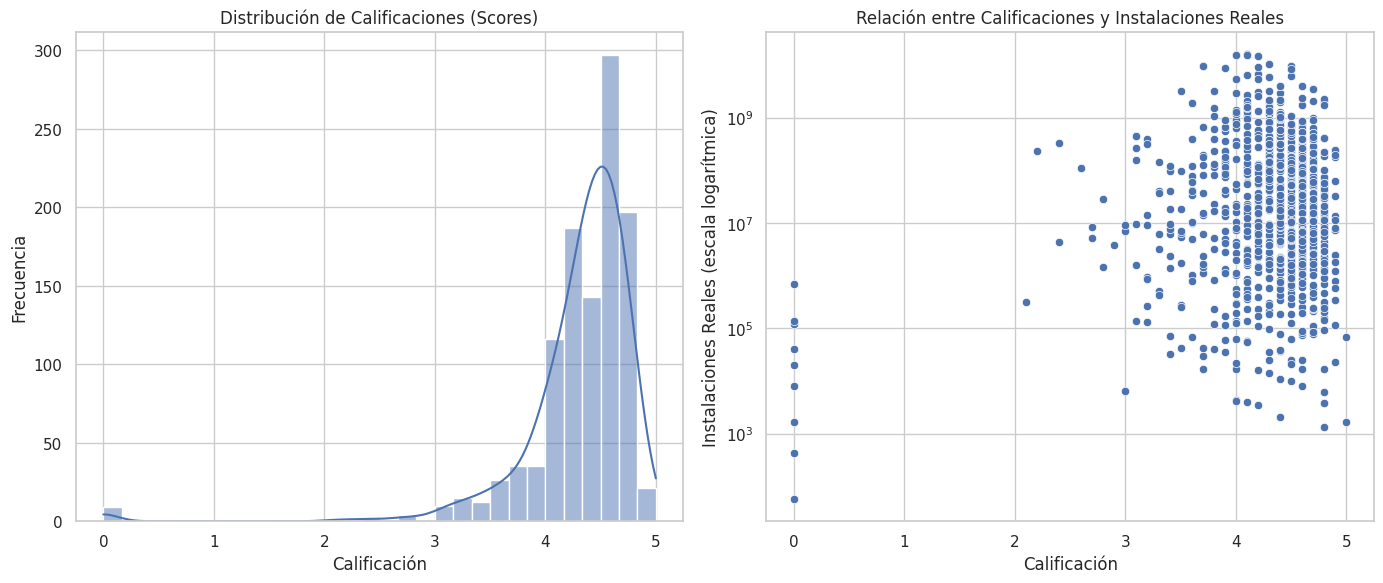

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/datos_apps_google_play_limpio.csv')

sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=data, x="score", bins=30, kde=True, ax=ax[0])
ax[0].set_title('Distribución de Calificaciones (Scores)')
ax[0].set_xlabel('Calificación')
ax[0].set_ylabel('Frecuencia')

sns.scatterplot(data=data, x="score", y="realInstalls", ax=ax[1])
ax[1].set_title('Relación entre Calificaciones y Instalaciones Reales')
ax[1].set_xlabel('Calificación')
ax[1].set_ylabel('Instalaciones Reales (escala logarítmica)')
ax[1].set_yscale('log')

plt.tight_layout()
plt.show()

<ipython-input-6-80d03a03c1e7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.Num_Apps, ax=axes[0], palette=palette)
<ipython-input-6-80d03a03c1e7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.Average_Installs, ax=axes[1], palette=palette)


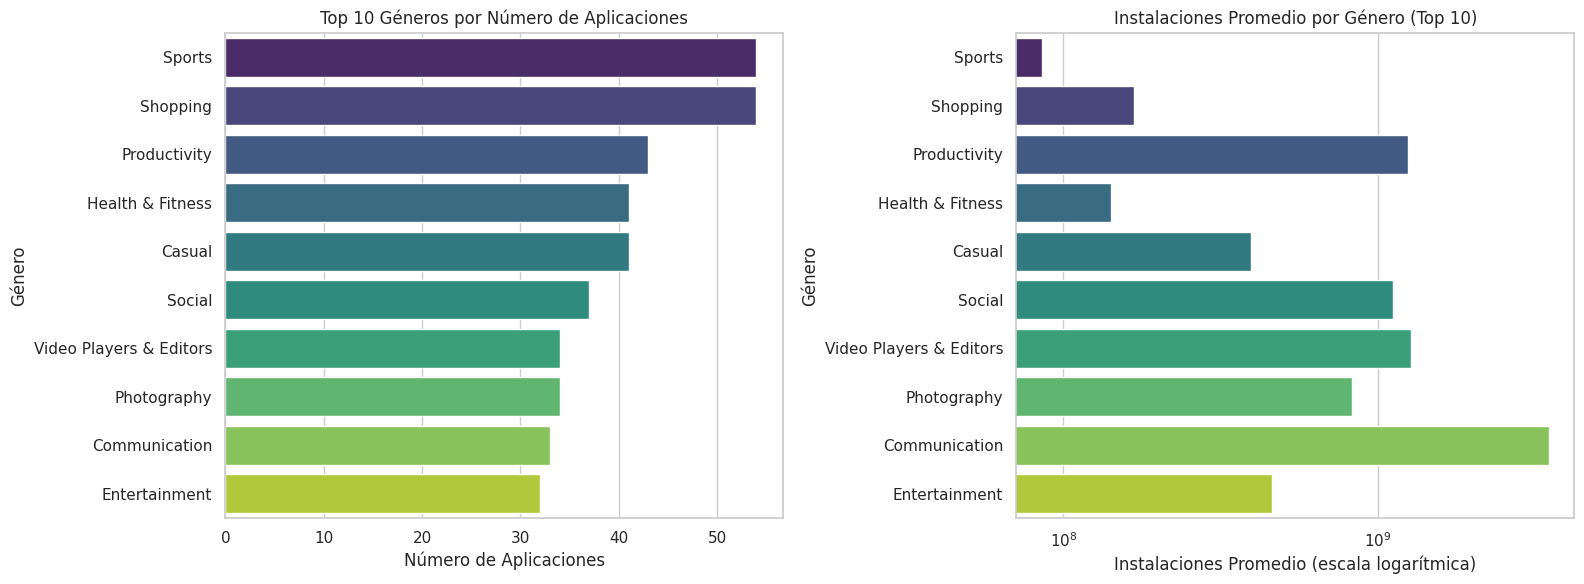

In [ ]:
genre_stats = data.groupby('genre').agg(
    Num_Apps=pd.NamedAgg(column="title", aggfunc="count"),
    Average_Rating=pd.NamedAgg(column="score", aggfunc="mean"),
    Total_Installs=pd.NamedAgg(column="realInstalls", aggfunc="sum"),
    Average_Installs=pd.NamedAgg(column="realInstalls", aggfunc="mean")
).sort_values(by="Num_Apps", ascending=False)

top_genres = genre_stats.head(10)

sns.set(style="whitegrid")
palette = sns.color_palette("viridis", n_colors=top_genres.shape[0])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(y=top_genres.index, x=top_genres.Num_Apps, ax=axes[0], palette=palette)
axes[0].set_title('Top 10 Géneros por Número de Aplicaciones')
axes[0].set_xlabel('Número de Aplicaciones')
axes[0].set_ylabel('Género')

sns.barplot(y=top_genres.index, x=top_genres.Average_Installs, ax=axes[1], palette=palette)
axes[1].set_title('Instalaciones Promedio por Género (Top 10)')
axes[1].set_xlabel('Instalaciones Promedio (escala logarítmica)')
axes[1].set_ylabel('Género')
axes[1].set_xscale('log')

plt.tight_layout()
plt.show()

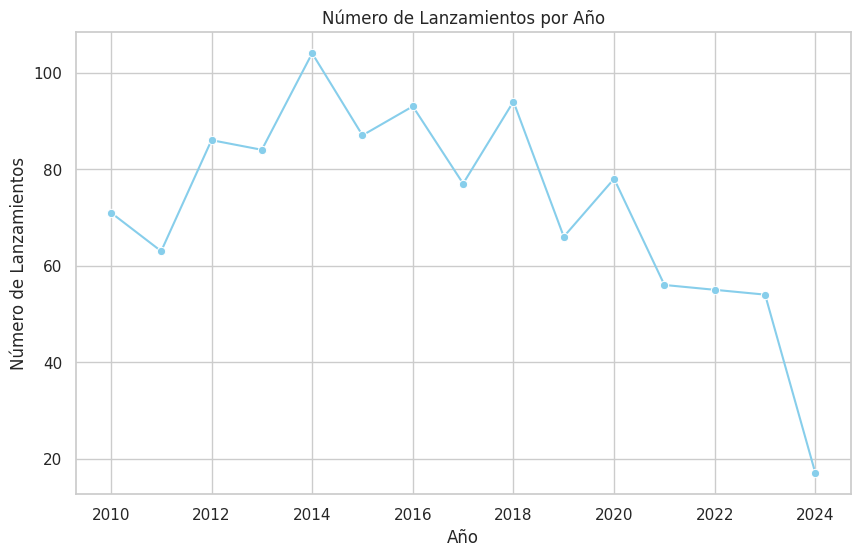

In [ ]:
data['released'] = pd.to_datetime(data['released'], errors='coerce')

data['released_year'] = data['released'].dt.year

yearly_releases = data.groupby('released_year').size()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.lineplot(x=yearly_releases.index, y=yearly_releases, marker='o', color='skyblue')
plt.title('Número de Lanzamientos por Año')
plt.xlabel('Año')
plt.ylabel('Número de Lanzamientos')

plt.show()

<ipython-input-8-3b3db156bd25>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='contentRating', data=data, order=data['contentRating'].value_counts().index, palette='viridis')


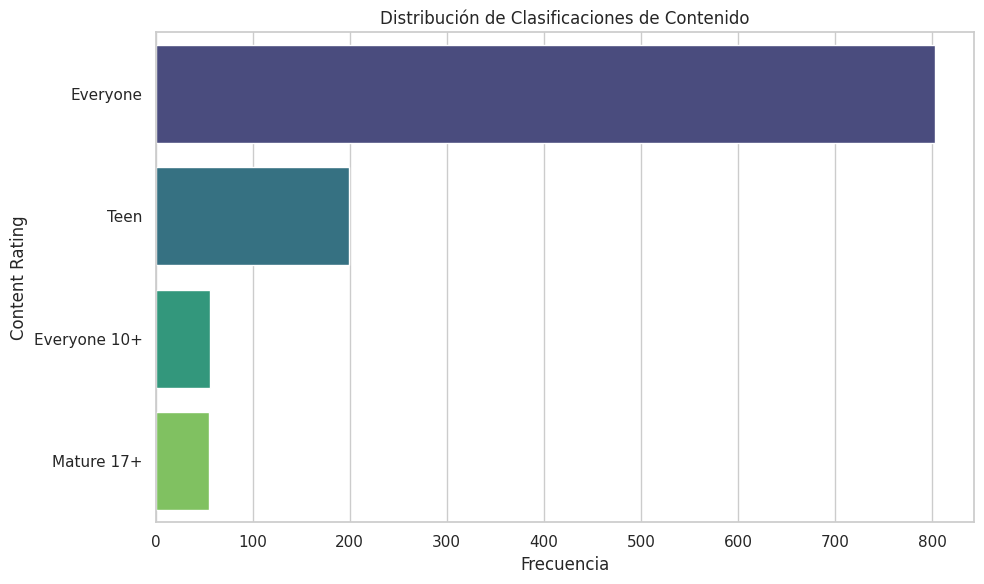

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.countplot(y='contentRating', data=data, order=data['contentRating'].value_counts().index, palette='viridis')
plt.title('Distribución de Clasificaciones de Contenido')
plt.xlabel('Frecuencia')
plt.ylabel('Content Rating')

plt.tight_layout()
plt.show()